In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('../'))


In [12]:
input_csv = 'csv/heart.csv'

In [13]:
data = pd.read_csv(input_csv)

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Correlation between Cholesterol and Blood Pressure: 0.10089294207709187


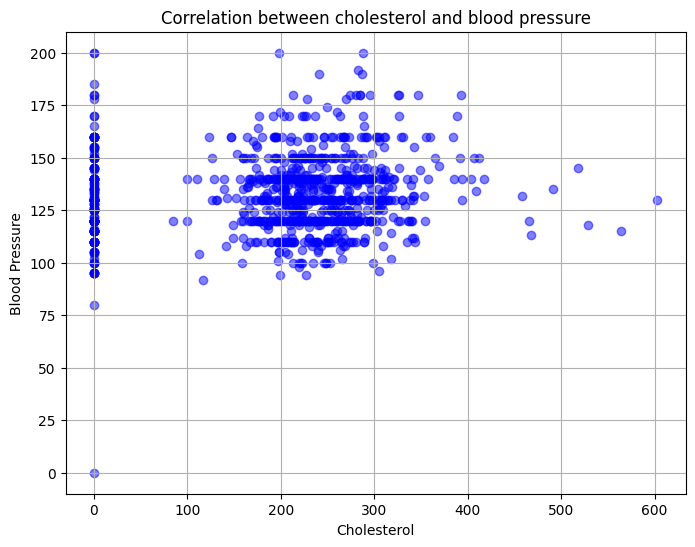

In [14]:
correlation_df = data[["Cholesterol", "RestingBP"]]
correlation = correlation_df["Cholesterol"].corr(correlation_df["RestingBP"])
print(f"Correlation between Cholesterol and Blood Pressure: {correlation}")
plt.figure(figsize=(8,6))
plt.scatter(correlation_df["Cholesterol"], correlation_df["RestingBP"], color="blue", alpha=0.5)
plt.title("Correlation between cholesterol and blood pressure")
plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.grid(True)
plt.show()

In [5]:
age_groups = pd.cut(data["Age"], bins=[0,30,40,50,60,70,80], labels=["<30","30-40","40-50","50-60","60-70","70-80"])
heart_disease_counts = data[data["HeartDisease"]==1].groupby([age_groups, "Sex"], observed=False).size().unstack()
most_common_chest_pain = data.groupby(age_groups, observed=False)["ChestPainType"].apply(lambda x: x.mode().iloc[0])
avg_hr_by_age = data.groupby(age_groups, observed=True)["MaxHR"].mean()


In [9]:
print("Heart disease cases and most common chest pain type by age group and gender")
print(pd.concat([heart_disease_counts, most_common_chest_pain, avg_hr_by_age], axis=1))

Heart disease cases and most common chest pain type by age group and gender
        F    M ChestPainType       MaxHR
Age                                     
<30     0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


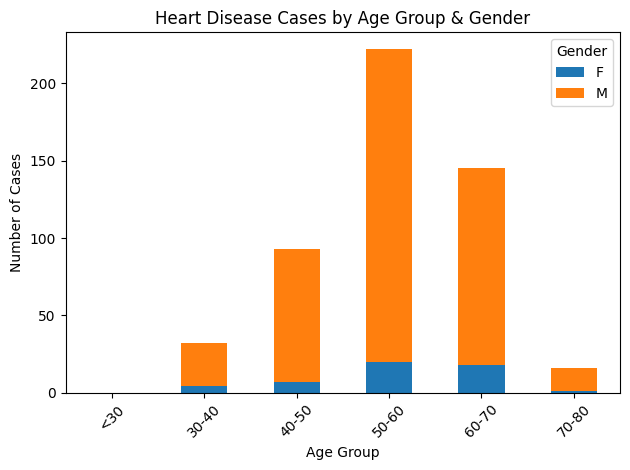

In [6]:
heart_disease_counts.plot(kind="bar", stacked=True)
plt.title("Heart Disease Cases by Age Group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()